In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
import itertools
import numpy as np

Using TensorFlow backend.


In [2]:
x = np.load("x.npy")
y = np.load("y.npy")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model

x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y)

In [4]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

305
102
305
102


In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(305, 224, 224, 3)
(102, 224, 224, 3)
(305,)
(102,)


In [6]:
from keras.utils import to_categorical

y_train_oh = to_categorical(y_train, num_classes = 2)
y_test_oh = to_categorical(y_test, num_classes = 2)

In [7]:
print(y_train_oh.shape)
print(y_test_oh.shape)

(305, 2)
(102, 2)


In [8]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [9]:
batch_size = 32
epochs = 20
num_classes = 2

In [10]:
from keras.applications import VGG16
#Load the VGG model
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(224,224, 3))

In [11]:
vgg_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x00000224E4FADE10> False
<keras.layers.convolutional.Conv2D object at 0x00000224E91BFE48> False
<keras.layers.convolutional.Conv2D object at 0x00000224E91BFBA8> False
<keras.layers.pooling.MaxPooling2D object at 0x00000224E91BFCF8> False
<keras.layers.convolutional.Conv2D object at 0x00000224E91EEC50> False
<keras.layers.convolutional.Conv2D object at 0x00000224EA0B9CF8> False
<keras.layers.pooling.MaxPooling2D object at 0x00000224EA0D5128> False
<keras.layers.convolutional.Conv2D object at 0x00000224EA0EB7F0> False
<keras.layers.convolutional.Conv2D object at 0x00000224EA108BA8> False
<keras.layers.convolutional.Conv2D object at 0x00000224EA11A320> False
<keras.layers.pooling.MaxPooling2D object at 0x00000224EA130940> False
<keras.layers.convolutional.Conv2D object at 0x00000224EA14CB00> False
<keras.layers.convolutional.Conv2D object at 0x00000224EA168E80> False
<keras.layers.convolutional.Conv2D object at 0x00000224EA17DAC8> False
<ker

In [13]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 40,407,874
Trainable params: 32,772,610
Non-trainable params: 7,635,264
_________________________________________________________________


In [14]:
optimizer=optimizers.RMSprop(lr=1e-4)
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])


In [15]:
#     img_rows, img_cols = x_train.shape[1],x_train.shape[2]
#     input_shape = (img_rows, img_cols, 3)
#     print("Input shape is",input_shape)
    
#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3),
#                      activation='relu',
#                      kernel_initializer='he_normal',
#                      input_shape=input_shape))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Conv2D(128, (3, 3), activation='relu'))
#     model.add(Dropout(0.4))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.3))
#     model.add(Dense(num_classes, activation='softmax'))
    
#     model.summary()
        
#     optimizer = SGD(lr=0.00000000001)

#     model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])
#     print("done")

In [16]:
history = model.fit(x_train, y_train_oh, batch_size=batch_size,epochs=epochs
                            ,verbose=1,validation_data=(x_test, y_test_oh))

Train on 305 samples, validate on 102 samples
Epoch 1/20
305/305 [==============================] - 8s 26ms/step - loss: 4.2793 - acc: 0.6656 - val_loss: 1.1004 - val_acc: 0.9020
Epoch 2/20
305/305 [==============================] - 2s 7ms/step - loss: 0.4189 - acc: 0.9344 - val_loss: 0.7542 - val_acc: 0.8824
Epoch 3/20
305/305 [==============================] - 2s 7ms/step - loss: 0.0886 - acc: 0.9836 - val_loss: 1.1189 - val_acc: 0.8824
Epoch 4/20
305/305 [==============================] - 2s 7ms/step - loss: 0.2377 - acc: 0.9541 - val_loss: 0.6062 - val_acc: 0.8824
Epoch 5/20
305/305 [==============================] - 2s 7ms/step - loss: 0.1620 - acc: 0.9738 - val_loss: 1.8023 - val_acc: 0.6765
Epoch 6/20
305/305 [==============================] - 2s 7ms/step - loss: 0.3096 - acc: 0.9607 - val_loss: 0.5767 - val_acc: 0.8824
Epoch 7/20
305/305 [==============================] - 2s 7ms/step - loss: 0.1137 - acc: 0.9902 - val_loss: 0.9789 - val_acc: 0.9020
Epoch 8/20
305/305 [=========

In [17]:
test_eval = model.evaluate(x_test,y_test_oh,verbose = 1)

102/102 [==============================] - 0s 5ms/step


Test loss: 1.15395455734
Test accuracy: 0.892156863914


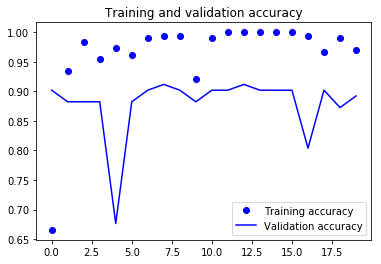

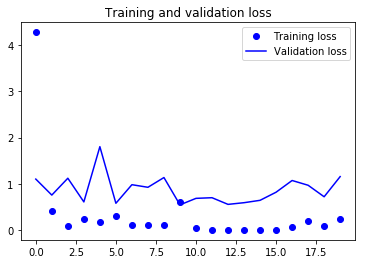

In [18]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [19]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis = 1) 


In [20]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig('importantconfusion_matrix.png', format='png')
    
    


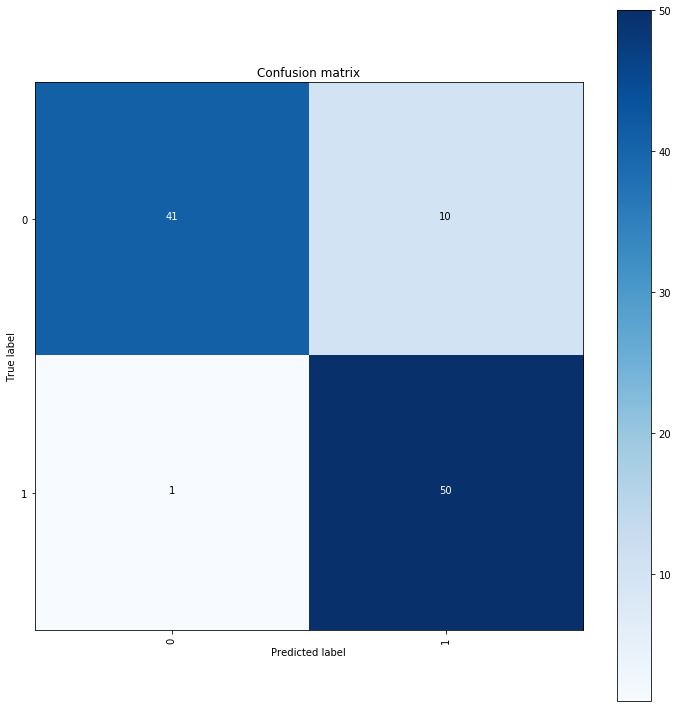

In [21]:
confusion_mtx = confusion_matrix(y_test, y_pred) 
dict_characters = {0: '0', 1: '1'}
plot_confusion_matrix(confusion_mtx, classes = list(dict_characters.values())) 
